# Ballon d'or 2021

In [1]:
from IPython.display import display, Markdown

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from functions import get_ranking, get_continent

plt.rcParams["figure.figsize"] = 10, 7

In [2]:
vote = pd.read_csv("vote.csv", index_col=0)
vote

,1,2,3,4,5
Country,,,,,
Albania,Jorginho,Messi,Lewandowski,Bonucci,Pedri
Algeria,Jorginho,De Bruyne,Mahrez,Lewandowski,Messi
Andorra,Messi,Haaland,Lewandowski,Lukaku,Mbappé
Angola,Lewandowski,Jorginho,Kanté,Cristiano Ronaldo,Messi
Argentina,Messi,Benzema,Cristiano Ronaldo,Suarez,Pedri
...,...,...,...,...,...
Vietnam,Messi,Lewandowski,Jorginho,Benzema,Kanté
Wales,Messi,Lewandowski,Jorginho,Cristiano Ronaldo,Salah
Yemen,Salah,Benzema,Mahrez,Cristiano Ronaldo,Mbappé


170 countries voted for the 2021 Ballon d'or. They have to choose 5 players among 30. The first one gets 6 points, the second 4, the third 3, the fourth 2 and the fifth 1. The player with most points wins the Ballon d'or.

## Overall Ranking

### Ranking

In [3]:
ranking = get_ranking(vote)
ranking

,Points,% of total points,% of max score
Messi,613,22.536765,60.098039
Lewandowski,580,21.323529,56.862745
Jorginho,460,16.911765,45.098039
Benzema,239,8.786765,23.431373
Kanté,186,6.838235,18.235294
Cristiano Ronaldo,178,6.544118,17.450980
Salah,121,4.448529,11.862745
De Bruyne,73,2.683824,7.156863
Mbappé,58,2.132353,5.686275
Donnarumma,36,1.323529,3.529412


Messi won with 613 points, ~ 60% of the maximal score (= 6 * 170)

### Analysis

<AxesSubplot:>

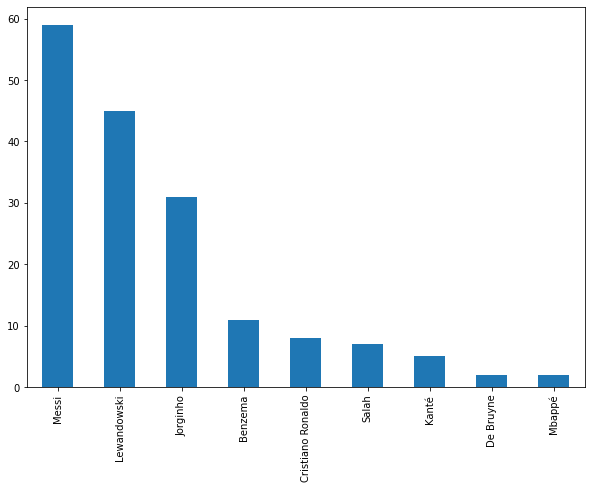

In [4]:
vote.loc[:, "1"].value_counts().plot.bar(x="Player", y="Count")

9 different players has been ranked first. Messi is the most cited with 59 (over 170).

Text(0.5, 1.0, 'Number of #1')

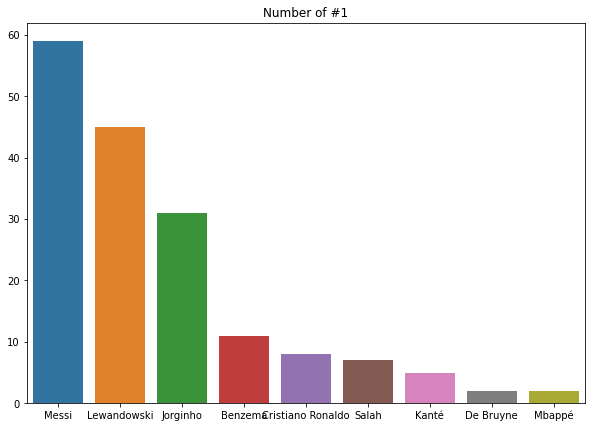

In [5]:
n_rank_first = vote.loc[:, "1"].value_counts()
sns.barplot(x=n_rank_first.index, y=n_rank_first.values)
plt.title("Number of #1")

In [6]:
name, count = np.unique(vote.to_numpy().flatten(), return_counts=True)
name = name[np.argsort(count)[::-1]]
count = np.sort(count)[::-1]

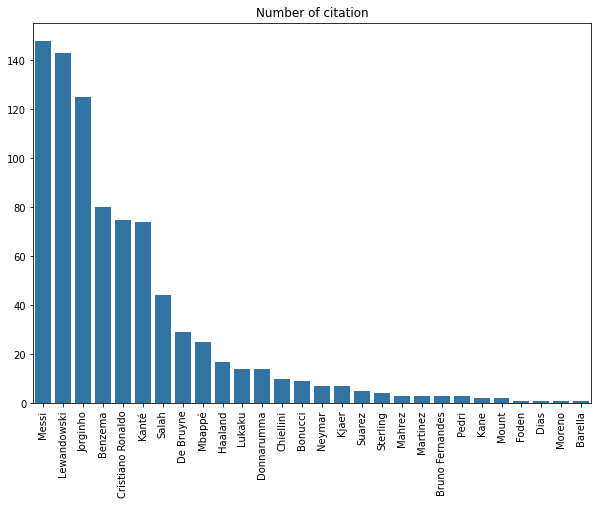

In [7]:
ax = sns.barplot(x=name, y=count, color="tab:blue")
ax.set_title("Number of citation")
ax.tick_params(axis="x", rotation=90)

148 voters gave points to Messi and 143 to Lewandowski.

## Ranking per continent

In [8]:
continent = get_continent(vote.index)
vote["continent"] = continent

In [9]:
ranking_continent = vote.groupby(continent).apply(get_ranking)

In [10]:
for c in ["AF", "AS", "EU", "NA", "SA", "OC"]:
    display(Markdown("### " + c))
    display(ranking_continent.loc[c].iloc[:10])

### AF

,Points,% of total points,% of max score
Lewandowski,184,23.469388,62.585034
Messi,159,20.280612,54.081633
Jorginho,127,16.198980,43.197279
Benzema,85,10.841837,28.911565
Kanté,64,8.163265,21.768707
Cristiano Ronaldo,58,7.397959,19.727891
Salah,46,5.867347,15.646259
De Bruyne,16,2.040816,5.442177
Haaland,10,1.275510,3.401361
Mbappé,9,1.147959,3.061224


### AS

,Points,% of total points,% of max score
Messi,141,22.03125,58.750000
Jorginho,113,17.65625,47.083333
Lewandowski,109,17.03125,45.416667
Benzema,54,8.43750,22.500000
Salah,50,7.81250,20.833333
Cristiano Ronaldo,49,7.65625,20.416667
Kanté,42,6.56250,17.500000
Mbappé,17,2.65625,7.083333
Donnarumma,10,1.56250,4.166667
Chiellini,8,1.25000,3.333333


### EU

,Points,% of total points,% of max score
Lewandowski,184,25.555556,68.148148
Jorginho,148,20.555556,54.814815
Messi,141,19.583333,52.222222
Benzema,48,6.666667,17.777778
Kanté,47,6.527778,17.407407
Cristiano Ronaldo,27,3.750000,10.000000
De Bruyne,26,3.611111,9.629630
Donnarumma,17,2.361111,6.296296
Haaland,14,1.944444,5.185185
Bonucci,14,1.944444,5.185185


### NA

,Points,% of total points,% of max score
Messi,103,29.261364,78.030303
Lewandowski,63,17.897727,47.727273
Jorginho,45,12.784091,34.090909
Cristiano Ronaldo,28,7.954545,21.212121
Kanté,26,7.386364,19.696970
Benzema,18,5.113636,13.636364
De Bruyne,15,4.261364,11.363636
Mbappé,14,3.977273,10.606061
Salah,13,3.693182,9.848485
Donnarumma,6,1.704545,4.545455


### SA

,Points,% of total points,% of max score
Messi,50,31.250,83.333333
Lewandowski,23,14.375,38.333333
Benzema,22,13.750,36.666667
Jorginho,19,11.875,31.666667
Cristiano Ronaldo,16,10.000,26.666667
Mbappé,7,4.375,11.666667
De Bruyne,6,3.750,10.000000
Lukaku,5,3.125,8.333333
Neymar,5,3.125,8.333333
Suarez,4,2.500,6.666667


### OC

,Points,% of total points,% of max score
Messi,19,29.6875,79.166667
Lewandowski,17,26.5625,70.833333
Benzema,12,18.7500,50.000000
Jorginho,8,12.5000,33.333333
Kanté,5,7.8125,20.833333
De Bruyne,2,3.1250,8.333333
Salah,1,1.5625,4.166667
Modric,0,0.0000,0.000000
Martinez,0,0.0000,0.000000
Mbappé,0,0.0000,0.000000


In Europe and Africa, Lewandowski is ranked first. In the other continents it's Messi.